<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/ERI_(Sediment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
from math import pi

In [ ]:
file_name = '/content/drive/MyDrive/Data/ST_HM_Mod.xlsx'
Ecology_df = pd.read_excel(file_name, sheet_name='ERI (SED)')
Ecology_df_cleaned = Ecology_df.dropna()
Ecology_df_cleaned.replace(to_replace=r'^-\.', value='-0.', regex=True, inplace=True)  # General fix for such patterns
Ecology_df_cleaned.iloc[:, 1:] = Ecology_df_cleaned.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
Ecology_df_melted = Ecology_df_cleaned.melt(id_vars='Element Name', var_name='Station', value_name='ERI')

<ipython-input-3-5445a90ae547>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Ecology_df_cleaned.replace(to_replace=r'^-\.', value='-0.', regex=True, inplace=True)  # General fix for such patterns
<ipython-input-3-5445a90ae547>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ecology_df_cleaned.replace(to_replace=r'^-\.', value='-0.', regex=True, inplace=True)  # General fix for such patterns


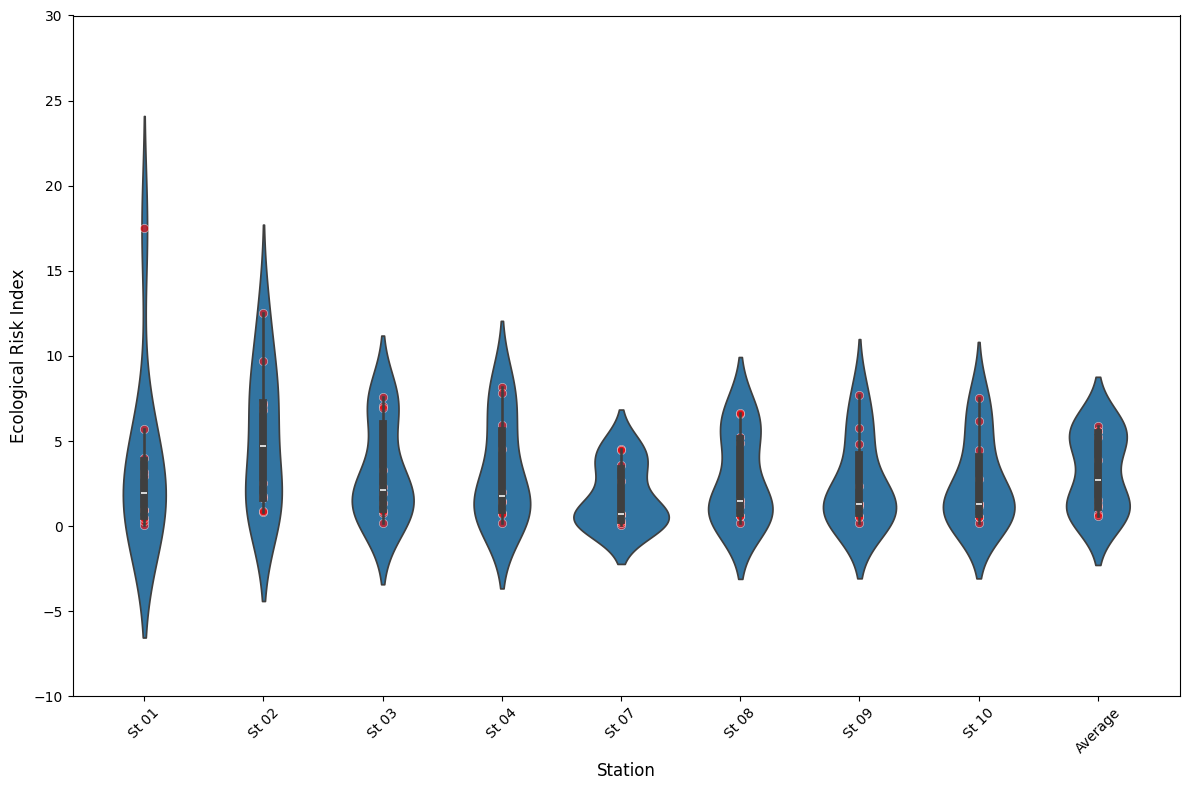

In [ ]:
plt.figure(figsize=(12, 8))

# Create the box plot for Contamination Factor (Cf) across different Stations
sns.violinplot(x='Station', y='ERI', data=Ecology_df_melted)
sns.scatterplot(x='Station', y='ERI', data=Ecology_df_melted, color='red', alpha=0.6)

plt.ylim(-10, 30)

# Set the title and labels
plt.xlabel('Station', fontsize=12)
plt.ylabel('Ecological Risk Index', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

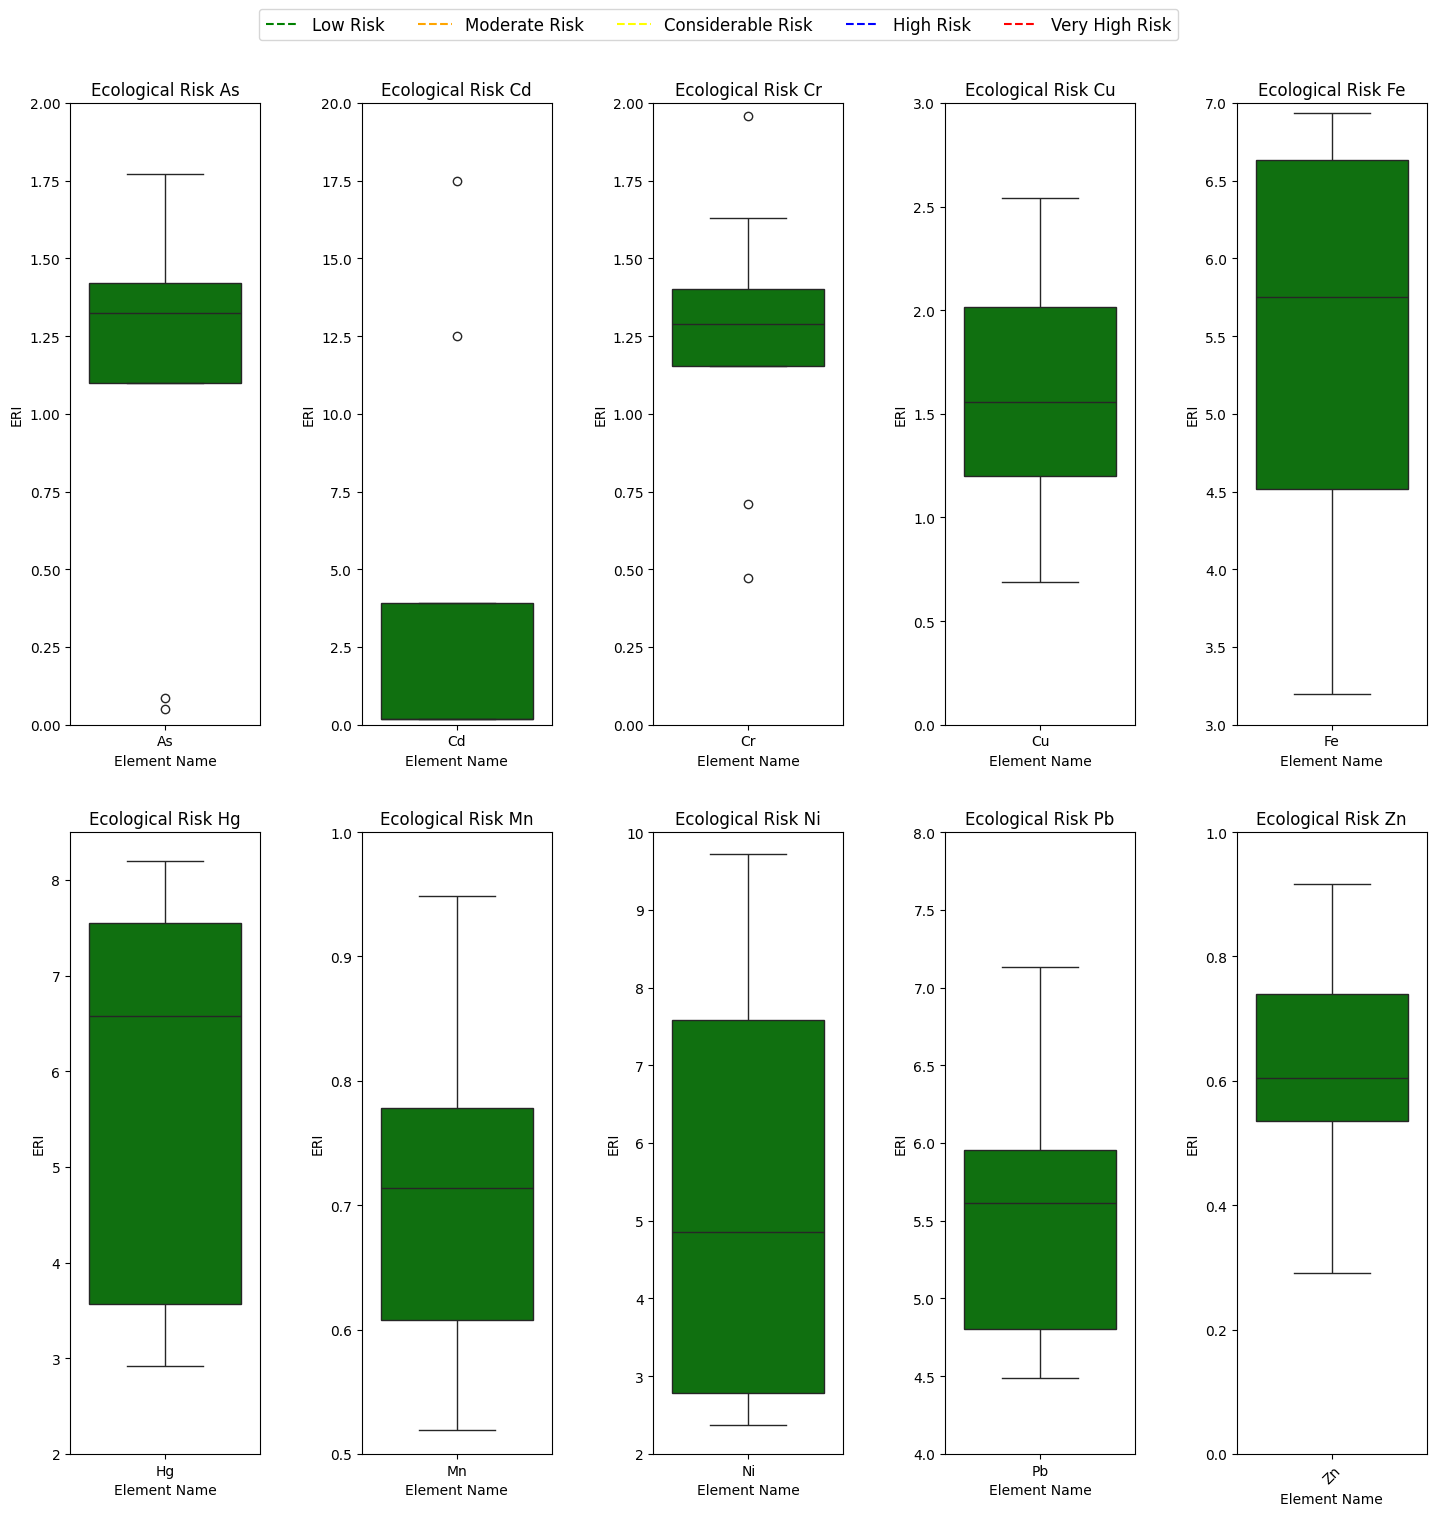

In [ ]:
# Define the color function for contamination categories
def get_color(c):
    if c < 40:
        return 'green'  # Low Risk
    elif 40 <= c < 80:
        return 'orange'  # Moderate Risk
    elif 80 <= c < 160:
        return 'yellow'  # Considerable Risk
    elif 160 <= c < 320:
        return 'blue'    # High Risk
    else:
        return 'red'  # Very High Risk

num_elements = Ecology_df_cleaned['Element Name'].nunique()
num_rows = 2
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

y_limits = {
    'As': [0., 2],
    'Pb': [4, 8],
    'Hg': [2.0, 8.5],
    'Fe': [3, 7],
    'Cd': [0, 20],
    'Mn': [0.5, 1],
    'Cu': [0, 3],
    'Zn': [0, 1],
    'Cr': [0, 2],
    'Ni': [2, 10]
}

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create a boxplot for each element in a separate subplot
for ax, (element_name, group) in zip(axes, Ecology_df_melted.groupby('Element Name')):
    color = get_color(group['ERI'].mean())  # Use average to determine color
    sns.boxplot(x='Element Name', y='ERI', data=group, ax=ax, color=color)
    ax.set_ylim(y_limits[element_name])  # Set individual y-axis limits
    ax.set_title(f'Ecological Risk {element_name}')
    ax.axhline(y=40, color='green', linestyle='--', label='Low Risk')
    ax.axhline(y=80, color='orange', linestyle='--', label='Moderate Risk')
    ax.axhline(y=160, color='yellow', linestyle='--', label='Considerable Risk')
    ax.axhline(y=320, color='blue', linestyle='--', label='High Risk')
    ax.axhline(y=320, color='red', linestyle='--', label='Very High Risk')

# Hide any unused axes
for i in range(num_elements, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=3.0)  # Add padding to prevent overlap
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last axis
fig.legend(handles, labels, loc='upper center', fontsize='large', ncol=5, bbox_to_anchor=(0.5, 1.02), borderaxespad=0.01)
plt.xticks(rotation=45)
plt.show()